In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC

from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

from scipy.optimize import minimize



## Logistic regression and SVM

#### knn refresher

In [3]:
newsgroups = sklearn.datasets.fetch_20newsgroups_vectorized()
X, y = newsgroups.data, newsgroups.target

In [4]:
X.shape

(11314, 130107)

In [5]:
y.shape

(11314,)

In [6]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [7]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [8]:
y_pred = knn.predict(X)

In [9]:
knn.score(X,y)

0.9999116139296447

Scoring on the data we used to train the model should not be done. Instead we should split our data in train and test subsets.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
knn.score(X_test, y_test)

0.6702014846235419

We can also perform the prediction for a single example, not the whole set.

In [13]:
knn.predict(X_test)[0]

14

In [14]:
knn1 = KNeighborsClassifier(n_neighbors = 1)
knn5 = KNeighborsClassifier(n_neighbors = 5)

knn1.fit(X_train, y_train)
knn5.fit(X_train, y_train)

print(knn1.score(X_test, y_test))
print(knn5.score(X_test, y_test))

0.6702014846235419
0.5765288087663485


#### Logistic regression

In [15]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)
logreg.predict(X_test)
logreg.score(X_test, y_test)

0.7917992223400495

Let us do another example on a different dataset.

In [16]:
wine = sklearn.datasets.load_wine()

In [17]:
logreg = LogisticRegression(max_iter = 5000)
logreg.fit(wine.data, wine.target)
logreg.score(wine.data, wine.target)

0.9943820224719101

We can also output confidence intervals and not hard numbers.

In [18]:
logreg.predict_proba(wine.data[:1])

array([[9.99806754e-01, 2.66795552e-05, 1.66566711e-04]])

#### Linear SVM

In [19]:
svm = LinearSVC(max_iter = 1000)
svm.fit(wine.data, wine.target)
svm.score(wine.data, wine.target)

C:\Users\Denis\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.6853932584269663

And now let us try a non-liner one:

In [20]:
svm = SVC()
svm.fit(wine.data, wine.target)
svm.score(wine.data, wine.target)

0.7078651685393258

Let us do some exercise.

In [21]:
digits = sklearn.datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression(max_iter = 5000)
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

# Apply SVM and print scores
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

1.0
0.9711111111111111
0.9948032665181886
0.9866666666666667


Let's visualize some of the decision boundaries of our models.

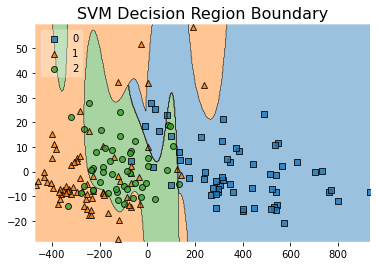

In [22]:
X = wine.data
y = wine.target

clf = SVC(C=100,gamma=0.0001)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X)
clf.fit(X_train2, y)
plot_decision_regions(X_train2, y, clf=clf, legend=2)

plt.title('SVM Decision Region Boundary', size=16)
plt.show()

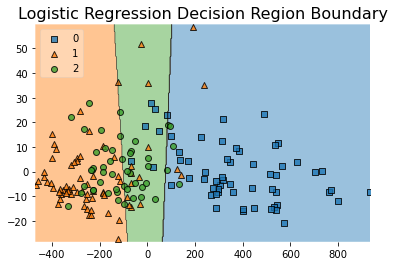

In [23]:
X = wine.data
y = wine.target

clf = LogisticRegression()
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X)
clf.fit(X_train2, y)
plot_decision_regions(X_train2, y, clf=clf, legend=2)

plt.title('Logistic Regression Decision Region Boundary', size=16)
plt.show()

## Loss function

In [24]:
x = np.arange(3)
x

array([0, 1, 2])

In [25]:
y = np.arange(3,6)
y

array([3, 4, 5])

In [26]:
x * y

array([ 0,  4, 10])

Computing the dot product can be done in two ways:

In [27]:
x @ y

14

In [28]:
np.sum(x * y)

14

In [29]:
breastcancer = sklearn.datasets.load_breast_cancer()

In [30]:
X = breastcancer.data

In [31]:
y = breastcancer.target

In [32]:
logreg = LogisticRegression(max_iter = 5000)

In [33]:
logreg.fit(X, y)

LogisticRegression(max_iter=5000)

In [34]:
logreg.predict(X)[10]

0

In [35]:
logreg.predict(X)[20]

1

In [36]:
logreg.coef_ @ X[10] + logreg.intercept_

array([-5.99707219])

The raw model output is negative and therefore the prediction is 0

In [37]:
logreg.coef_ @ X[20] + logreg.intercept_

array([5.2190837])

The raw model output is positive and therefore the prediction is 1

We can also change the coefficients manually, instead of using fit()

Let us now try to minimize the loss function.

In [38]:
minimize(np.square, 0).x

array([0.])

In [39]:
minimize(np.square, 2).x

array([-1.88846401e-08])

Let us implement a linear regression from scratch on the Boston dataset.

In [40]:
boston = sklearn.datasets.load_boston()
X, y = boston.data, boston.target

In [41]:
X_1 = boston.data

In [42]:
X_1.shape

(506, 13)

In [43]:
X.shape

(506, 13)

In [44]:
y.shape

(506,)

In [45]:
# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[-9.28967216e-02  4.87147166e-02 -4.06378288e-03  2.85400590e+00
 -2.86837342e+00  5.92813683e+00 -7.26924629e-03 -9.68512149e-01
  1.71144310e-01 -9.39578125e-03 -3.92189417e-01  1.49054562e-02
 -4.16305997e-01]
[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]


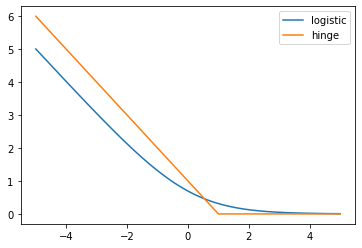

In [46]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
    return np.log(1+np.exp(-raw_model_output))

def hinge_loss(raw_model_output):
    return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-5,5,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

Now let us implement a logistic regression.

## Logistic Regression and Regularization

In [47]:
digits = sklearn.datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

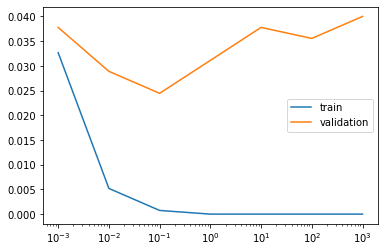

In [48]:
# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Loop over values of C_value
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(max_iter = 10000, C = C_value)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train))
    valid_errs.append( 1.0 - lr.score(X_test, y_test))
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

In [49]:
# Specify L1 regularization
lr = LogisticRegression(penalty='l1', max_iter = 10000, solver='liblinear')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 0.1}
Total number of features: 640
Number of selected features: 252


In [50]:
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(multi_class='ovr', n_jobs=1,
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [52]:
# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 0.1}
Total number of features: 640
Number of selected features: 610


In [53]:
def show_digit(i, lr=None):
    plt.imshow(np.reshape(X[i], (8,8)), cmap='gray', vmin = 0, vmax = 16, interpolation=None)
    plt.xticks(())
    plt.yticks(())
    if lr is None:
        plt.title("class label = %d" % y[i])
    else:
        pred = lr.predict(X[i][None])
        pred_prob = lr.predict_proba(X[i][None])[0,pred]
        plt.title("label=%d, prediction=%d, proba=%.2f" % (y[i], pred, pred_prob))
    plt.show()

In [54]:
X = digits.data

In [55]:
y = digits.target

C:\Users\Denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


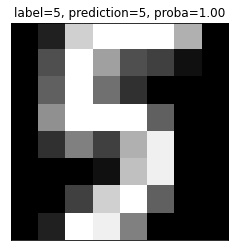

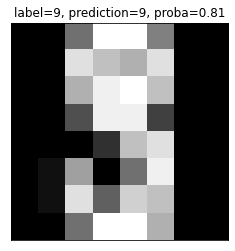

In [56]:
lr = LogisticRegression()
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

In [57]:
proba_inds

array([1658, 1553,  363, ..., 1512, 1625,   32], dtype=int64)

#### Multiclass classification

In [58]:
digits = sklearn.datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [81]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class="multinomial", solver="lbfgs")
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

OVR training accuracy: 0.8045112781954887
OVR test accuracy    : 0.7555555555555555
Softmax training accuracy: 0.8045112781954887
Softmax test accuracy    : 0.7555555555555555


In [82]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [83]:
def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

In [84]:
def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

Softmax     training accuracy: 0.7819548872180451
One-vs-rest training accuracy: 0.7819548872180451


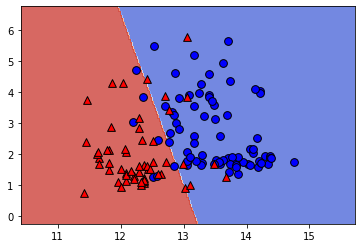

In [87]:
# Print training accuracies
print("Softmax     training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(C=100)
lr_class_1.fit(X_train, y_train==1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train==1, lr_class_1)

## SMV

In [64]:
X = wine.data
y = wine.target

In [65]:
X = X[:,:2]

In [66]:
X

array([[14.23,  1.71],
       [13.2 ,  1.78],
       [13.16,  2.36],
       [14.37,  1.95],
       [13.24,  2.59],
       [14.2 ,  1.76],
       [14.39,  1.87],
       [14.06,  2.15],
       [14.83,  1.64],
       [13.86,  1.35],
       [14.1 ,  2.16],
       [14.12,  1.48],
       [13.75,  1.73],
       [14.75,  1.73],
       [14.38,  1.87],
       [13.63,  1.81],
       [14.3 ,  1.92],
       [13.83,  1.57],
       [14.19,  1.59],
       [13.64,  3.1 ],
       [14.06,  1.63],
       [12.93,  3.8 ],
       [13.71,  1.86],
       [12.85,  1.6 ],
       [13.5 ,  1.81],
       [13.05,  2.05],
       [13.39,  1.77],
       [13.3 ,  1.72],
       [13.87,  1.9 ],
       [14.02,  1.68],
       [13.73,  1.5 ],
       [13.58,  1.66],
       [13.68,  1.83],
       [13.76,  1.53],
       [13.51,  1.8 ],
       [13.48,  1.81],
       [13.28,  1.64],
       [13.05,  1.65],
       [13.07,  1.5 ],
       [14.22,  3.99],
       [13.56,  1.71],
       [13.41,  3.84],
       [13.88,  1.89],
       [13.

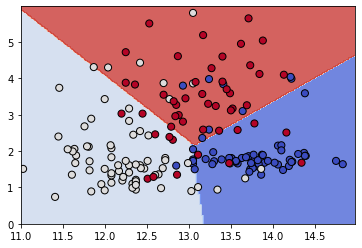

Number of original examples 178
Number of support vectors 81


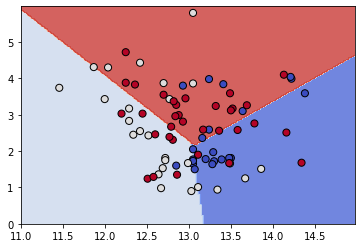

In [67]:
# Train a linear SVM
svm = SVC(kernel="linear")
svm.fit(X,y)
plot_classifier(X, y, svm, lims=(11,15,0,6))

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))

In [68]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, param_grid=parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'C': 10, 'gamma': 0.001}
Best CV accuracy 0.9903510945890128
Test accuracy of best grid search hypers: 0.9933333333333333


In [69]:
# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge','log'], 'penalty':['l1','l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

C:\Users\Denis\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Denis\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Denis\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Denis\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

Best CV params {'alpha': 0.1, 'loss': 'log', 'penalty': 'l2'}
Best CV accuracy 0.9621503593145384
Test accuracy of best grid search hypers: 0.9555555555555556
